In [104]:
#titration plots for different solutions


from phreeqpython import PhreeqPython

import numpy as np


from matplotlib import pyplot as plt

import pandas as  pd




In [105]:
# some unecessary style settings

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})



In [106]:
#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants

# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')

#for differnt temperatures
temp=25

temp2=5

solution1=pp.add_solution({'temp':temp})

solution2=pp.add_solution({'temp':temp2})



In [107]:
solution1.pH

7.0

In [108]:
solution2.pH

7.0

In [109]:
# rise partial pressure of CO2 stepwise


#pCO2 range

pH_s1=[]

pH_s2=[]

DIC_s1=[]

DIC_s2=[]

CO2_list=[10**(item/20) for item in range(0, 100+1)]

for p in CO2_list:
    
    # p= concentration CO2
    #p=415 # ppm

    #partial pressure pCO2 in atm
    pCO2=p*1e-6 
    
    #because log10(0)=not defined
    if pCO2==0:
        pH_s1.append(solution1.pH)
    
        pH_s2.append(solution2.pH)
        
        # add the total DIC (in pure species and also in complexes)
        DIC_s1.append(solution1.total('CO2',units='mol')+
                      solution1.total('HCO3',units='mol')+solution1.total('CO3',units='mol'))
        
        DIC_s2.append(solution2.total('CO2',units='mol')+
                      solution2.total('HCO3',units='mol')+solution2.total('CO3',units='mol'))
        
        
    else:
        #phreeqc always uses log10 values
        input_pCO2=np.log10(pCO2)


        # equalize solution with CO2
        # equilibrium with atmosphere
        solution1.equalize(['CO2(g)'], [input_pCO2])

        solution2.equalize(['CO2(g)'], [input_pCO2])

        pH_s1.append(solution1.pH)

        pH_s2.append(solution2.pH)
        
        # add the total DIC (in pure species and also in complexes)
        DIC_s1.append(solution1.total('CO2',units='mol')+
                      solution1.total('HCO3',units='mol')+solution1.total('CO3',units='mol'))
        
        DIC_s2.append(solution2.total('CO2',units='mol')+
                      solution2.total('HCO3',units='mol')+solution2.total('CO3',units='mol'))
        
        
    
    


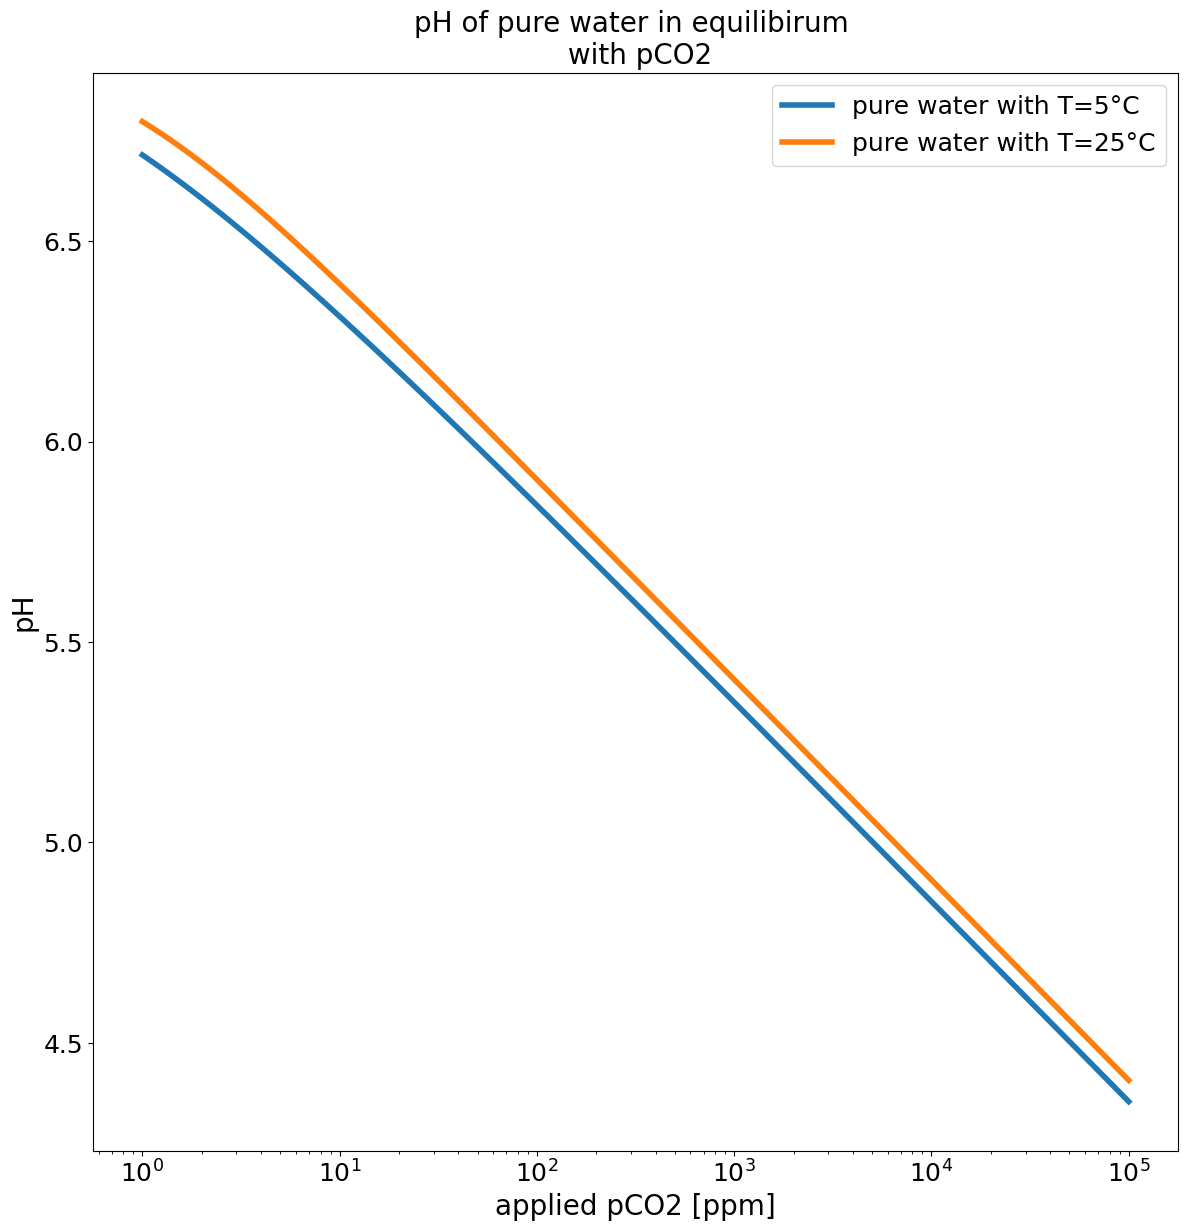

In [110]:
fig = plt.figure(figsize=[14,14])

plt.plot(CO2_list,pH_s2, label='pure water with T={}°C'.format(temp2))

plt.plot(CO2_list,pH_s1, label='pure water with T={}°C'.format(temp))



plt.ylabel('pH')

plt.xscale('log')

plt.xlabel('applied pCO2 [ppm]')

plt.legend(loc='upper right')

plt.title('pH of pure water in equilibirum \n with pCO2')


plt.savefig('titration-plot.pdf')  

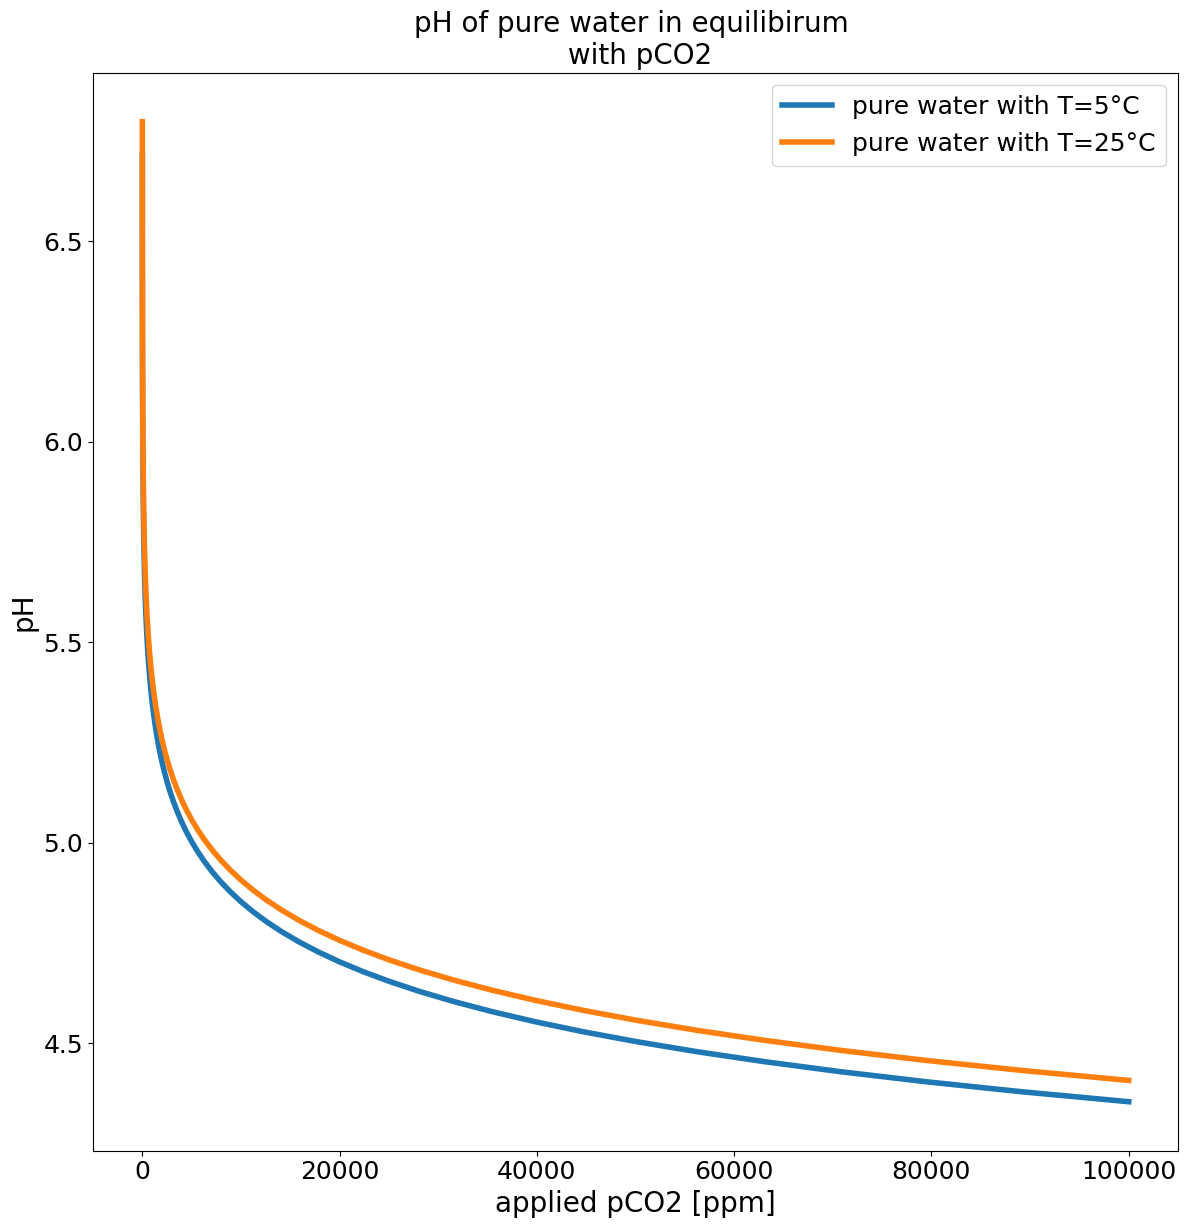

In [111]:
fig = plt.figure(figsize=[14,14])

plt.plot(CO2_list,pH_s2, label='pure water with T={}°C'.format(temp2))

plt.plot(CO2_list,pH_s1, label='pure water with T={}°C'.format(temp))



plt.ylabel('pH')


plt.xlabel('applied pCO2 [ppm]')

plt.legend(loc='upper right')

plt.title('pH of pure water in equilibirum \n with pCO2')


plt.savefig('titration-plot.pdf')  

In [112]:
solution1.species

{'CH4': 7.58351118664917e-19,
 'CO2': 0.0034544448035602935,
 'CO3-2': 4.828467971728901e-11,
 'H+': 3.94819838412116e-05,
 'H2': 6.883120145761528e-14,
 'H2O': 55.50925842549961,
 'HCO3-': 3.948284368027708e-05,
 'O2': 0.0,
 'OH-': 2.6010629248311385e-10}

# DIC as a function of pCO2



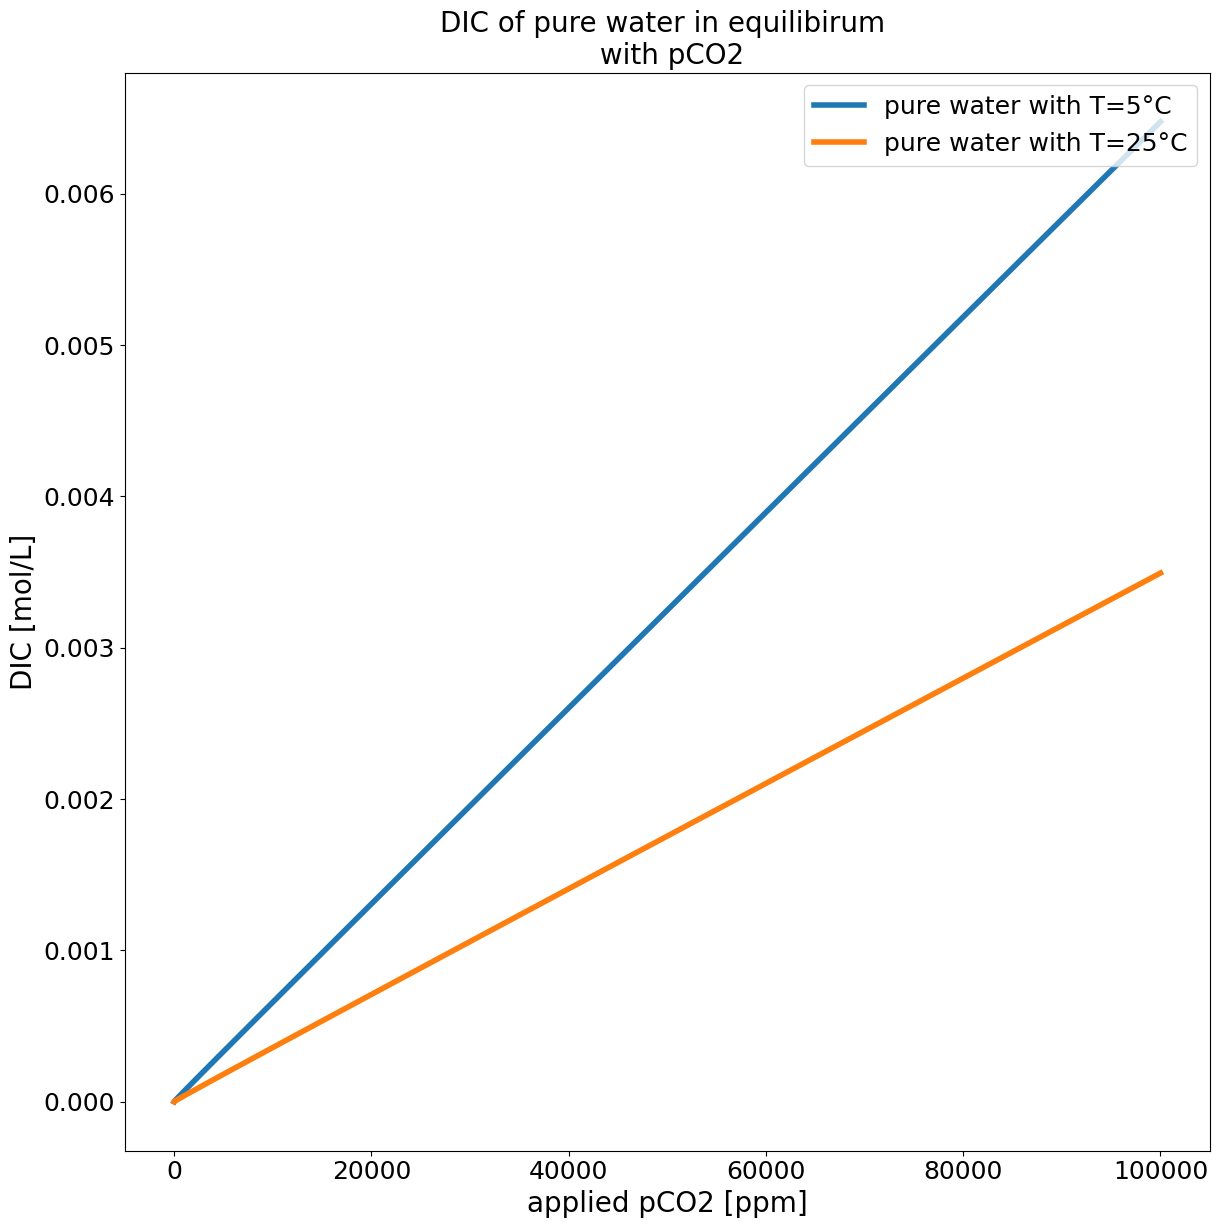

In [113]:
fig = plt.figure(figsize=[14,14])

plt.plot(CO2_list,DIC_s2, label='pure water with T={}°C'.format(temp2))

plt.plot(CO2_list,DIC_s1, label='pure water with T={}°C'.format(temp))



plt.ylabel('DIC [mol/L]')


plt.xlabel('applied pCO2 [ppm]')

plt.legend(loc='upper right')

plt.title('DIC of pure water in equilibirum \n with pCO2')


plt.savefig('pCO2-DIC-plot.pdf')  

In [114]:
def DIC(p):
    
    temp=25

    #partial pressure pCO2 in atm
    pCO2=p*1e-6 

    #phreeqc always uses log10 values
    input_pCO2=np.log10(pCO2)

    sol_x=pp.add_solution({'temp':temp}).equalize(['CO2(g)'], [input_pCO2])

    DIC_x=sol_x.total('CO2',units='mol')+sol_x.total('HCO3',units='mol')+sol_x.total('CO3',units='mol')

    #molar volume =1 mol gas volume at 1 bar and 25 deg
    
    V_mol=24.78 #l/mol
    
    #howe much water in the reactor
    V_water=10 # l
    
    #volume of CO2 at pressure of 1 bar in 1 liter
    CO2_l=V_mol*DIC_x*V_water  # l/mol * mol/l
    
    return DIC_x,CO2_l


In [120]:
# DIC of ambient
print(DIC(450))

#DIC of reactor
print(DIC(150000))

# difference (what would gas out)
print('volume of CO2 that is not bound by the water V={:} L'.format(DIC(150000)[1]-DIC(450)[1]))



(1.818757546411378e-05, 0.004506881200007395)
(0.005228607136726744, 1.2956488484808872)
volume of CO2 that is not bound by the water V=1.2911419672808742


In [ ]:
# summary in 10 l water there is without any alkalinity 1.3 l CO2